In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
all_Feature_File = pd.read_csv('Titanic-Dataset.csv')
all_Feature_File.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
all_Feature_File1 = all_Feature_File[['Age', 'Fare', 'SibSp', 'Parch','Survived','Pclass']]
all_Feature_File1.head()


,Age,Fare,SibSp,Parch,Survived,Pclass
0,22.0,7.2500,1,0,0,3
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,3
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,3


In [63]:
all_Feature_File1.isnull().sum().sum()

np.int64(177)

Filled all age value with mean

In [64]:
all_Feature_File1['Age'] = all_Feature_File1['Age'].fillna(all_Feature_File1['Age'].mean())

/tmp/ipython-input-64-2601170445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_Feature_File1['Age'] = all_Feature_File1['Age'].fillna(all_Feature_File1['Age'].mean())


In [65]:
all_Feature_File1.isnull().sum().sum() #give zero null value

np.int64(0)

In [66]:
all_Feature_File1['Age'] = all_Feature_File1['Age'].astype(int)
all_Feature_File1.head()

/tmp/ipython-input-66-1244904404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_Feature_File1['Age'] = all_Feature_File1['Age'].astype(int)


,Age,Fare,SibSp,Parch,Survived,Pclass
0,22,7.2500,1,0,0,3
1,38,71.2833,1,0,1,1
2,26,7.9250,0,0,1,3
3,35,53.1000,1,0,1,1
4,35,8.0500,0,0,0,3


In [67]:
from sklearn.preprocessing import RobustScaler
min_max = RobustScaler()
columns_to_scale = ['Age', 'Fare']  # Use list, not DataFrame
df_scaled = all_Feature_File1.copy()
df_scaled[columns_to_scale] = min_max.fit_transform(all_Feature_File1[columns_to_scale])


In [68]:
df_scaled.head()

,Age,Fare,SibSp,Parch,Survived,Pclass
0,0.2750,0.014151,1,0,0,3
1,0.4750,0.139136,1,0,1,1
2,0.3250,0.015469,0,0,1,3
3,0.4375,0.103644,1,0,1,1
4,0.4375,0.015713,0,0,0,3


In [69]:
x = df_scaled.drop('Survived' ,axis= 1)
y = df_scaled['Survived']

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [71]:
from sklearn.linear_model import LogisticRegression
model  = LogisticRegression()

In [72]:
print(X_train)

        Age      Fare  SibSp  Parch  Pclass
331  0.5625  0.055628      0      0       1
733  0.2875  0.025374      0      0       2
382  0.4000  0.015469      0      0       3
704  0.3250  0.015330      1      0       3
813  0.0750  0.061045      4      2       3
..      ...       ...    ...    ...     ...
106  0.2625  0.014932      0      0       3
270  0.3625  0.060508      0      0       1
860  0.5125  0.027538      2      0       3
435  0.1750  0.234224      1      2       1
102  0.2625  0.150855      0      1       1

[712 rows x 5 columns]


In [73]:
model.fit(X_train, Y_train)

LogisticRegression()

In [74]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0]


In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))


Accuracy: 0.7318435754189944
Confusion Matrix:
 [[93 12]
 [36 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.79       105
           1       0.76      0.51      0.61        74

    accuracy                           0.73       179
   macro avg       0.74      0.70      0.70       179
weighted avg       0.74      0.73      0.72       179



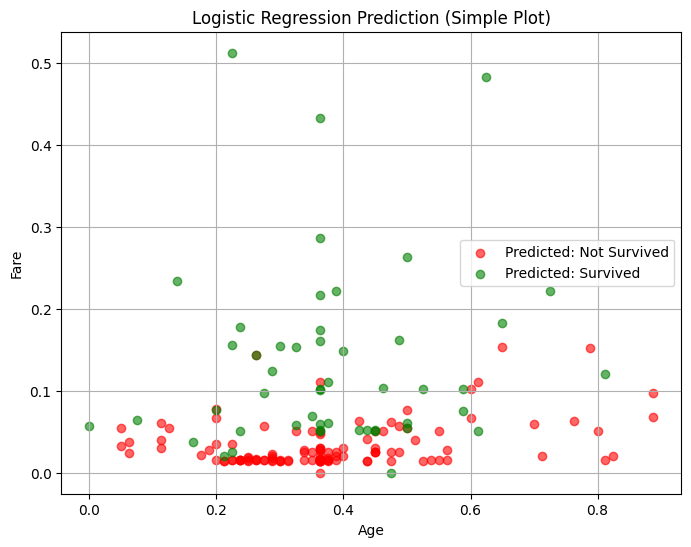

In [76]:
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)


plt.figure(figsize=(8, 6))


plt.scatter(X_test[y_pred == 0]['Age'], X_test[y_pred == 0]['Fare'],
            color='red', label='Predicted: Not Survived', alpha=0.6)


plt.scatter(X_test[y_pred == 1]['Age'], X_test[y_pred == 1]['Fare'],
            color='green', label='Predicted: Survived', alpha=0.6)


plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Logistic Regression Prediction (Simple Plot)')
plt.legend()
plt.grid(True)
plt.show()
